In [9]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import datetime
import matplotlib
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt


In [6]:
df=pd.read_csv('datalab.csv',encoding='utf-8',header=0)
df=df.set_index('date')
print(df.info())
'''
#minmaxscaler로 모든 데이터를 정규화시켜 0과 1사이의 값으로 변환
scaler=MinMaxScaler()
df[:]=scaler.fit_transform(df[:])
print(df.info())
df
'''

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 2019-11-20 to 2020-12-17
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   corona               394 non-null    float64
 1   cough                394 non-null    float64
 2   fever                394 non-null    float64
 3   muscle_pain          394 non-null    float64
 4   vomit                394 non-null    float64
 5   diarrhea             394 non-null    float64
 6   naver_senti_score    394 non-null    int64  
 7   naver_num            394 non-null    int64  
 8   twitter_senti_score  394 non-null    int64  
 9   twitter_num          394 non-null    int64  
 10  covid_num            394 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 36.9+ KB
None


'\n#minmaxscaler로 모든 데이터를 정규화시켜 0과 1사이의 값으로 변환\nscaler=MinMaxScaler()\ndf[:]=scaler.fit_transform(df[:])\nprint(df.info())\ndf\n'

In [7]:
corr = df.corr(method = 'pearson')
corr

,corona,cough,fever,muscle_pain,vomit,diarrhea,naver_senti_score,naver_num,twitter_senti_score,twitter_num,covid_num
corona,1.000000,0.595240,0.540368,0.657276,0.278667,0.417473,-0.074462,0.062129,-0.292276,0.255503,0.656692
cough,0.595240,1.000000,0.933669,0.850914,0.599678,0.528716,-0.149110,0.105194,-0.175216,0.099736,0.124482
fever,0.540368,0.933669,1.000000,0.848749,0.607818,0.566016,-0.172534,0.133790,-0.278706,0.215944,0.116555
muscle_pain,0.657276,0.850914,0.848749,1.000000,0.579210,0.746105,-0.153080,0.112154,-0.463983,0.409592,0.183278
vomit,0.278667,0.599678,0.607818,0.579210,1.000000,0.561266,-0.085972,0.071732,-0.105144,0.091298,0.143685
diarrhea,0.417473,0.528716,0.566016,0.746105,0.561266,1.000000,-0.144214,0.104230,-0.501906,0.437407,0.089392
naver_senti_score,-0.074462,-0.149110,-0.172534,-0.153080,-0.085972,-0.144214,1.000000,-0.968996,0.061519,-0.064672,-0.094596
naver_num,0.062129,0.105194,0.133790,0.112154,0.071732,0.104230,-0.968996,1.000000,-0.058340,0.059843,0.096885
twitter_senti_score,-0.292276,-0.175216,-0.278706,-0.463983,-0.105144,-0.501906,0.061519,-0.058340,1.000000,-0.803836,-0.040627
twitter_num,0.255503,0.099736,0.215944,0.409592,0.091298,0.437407,-0.064672,0.059843,-0.803836,1.000000,0.081770


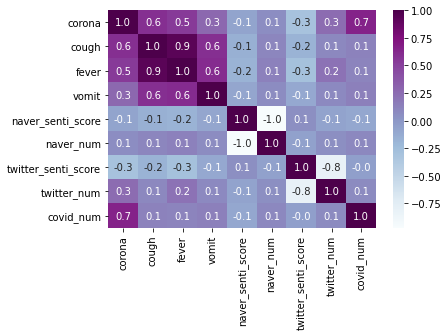

In [31]:
sns.heatmap(df.corr(), annot = True, cmap='BuPu',fmt='.1f')
plt.show()

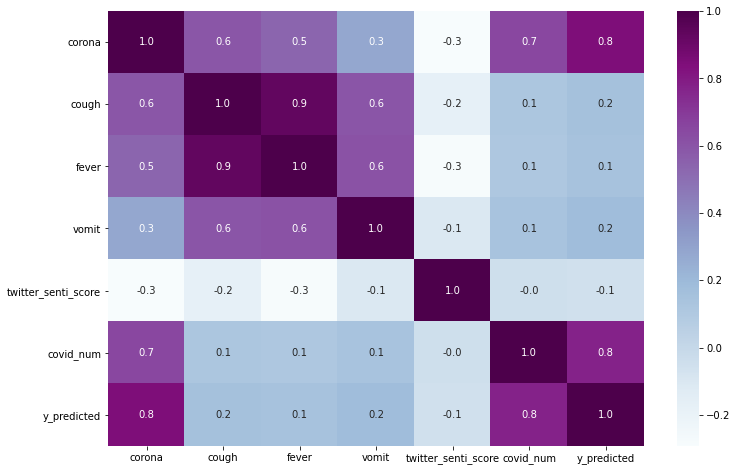

In [66]:
sns.heatmap(df_re2.corr(), annot = True, cmap='BuPu',fmt='.1f')
plt.show()

In [67]:
lm_model_df_re2 = smf.ols('covid_num~ corona+cough+fever+vomit+twitter_senti_score',data=df_re2).fit()
print(lm_model_df_re2.summary())

                            OLS Regression Results                            
Dep. Variable:              covid_num   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     118.4
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           8.71e-76
Time:                        16:33:41   Log-Likelihood:                -2432.3
No. Observations:                 394   AIC:                             4877.
Df Residuals:                     388   BIC:                             4900.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.6237    

In [8]:
df

,corona,cough,fever,muscle_pain,vomit,diarrhea,naver_senti_score,naver_num,twitter_senti_score,twitter_num,covid_num
date,,,,,,,,,,,
2019-11-20,0.00823,10.11235,6.20934,9.99408,5.89394,18.13522,-34,19,0,0,0
2019-11-21,0.00937,10.78257,5.47999,9.71811,6.46560,17.48472,-5,4,-221,189,0
2019-11-22,0.00819,9.77725,3.64675,9.30415,5.32229,17.72126,5,2,-132,54,0
2019-11-23,0.00860,9.54070,2.75970,7.90459,5.63768,16.59767,-1,1,-107,45,0
2019-11-24,0.00676,9.77725,3.27222,8.29883,5.40114,18.35205,-9,2,-102,31,0
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-13,46.28487,9.50128,7.25409,15.19810,7.49063,22.82672,0,0,-800,100,1030
2020-12-14,44.52544,9.93494,10.90084,18.47033,9.40272,23.89118,3,1,-551,77,718
2020-12-15,34.52029,9.59984,10.54602,15.94717,8.67336,22.27478,0,0,-544,89,880


In [10]:

# 학습 데이터와 테스트 데이터로 분리합니다.
#'선수명', 'y'를 제외한 칼럼들은 X
X = df[df.columns.difference(['covid_num'])]
y = df['covid_num']

#검증(test)는 20%로 한다. = test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19)

date
2019-11-20       0
2019-11-21       0
2019-11-22       0
2019-11-23       0
2019-11-24       0
              ... 
2020-12-13    1030
2020-12-14     718
2020-12-15     880
2020-12-16    1078
2020-12-17    1014
Name: covid_num, Length: 394, dtype: int64


In [11]:
# 회귀 분석 객체 생성(선형 회귀 모델 생성)
lr = linear_model.LinearRegression()

#fit()는 기울기와 절편을 전달하기 위함.
model = lr.fit(X_train, y_train)

# 학습된 계수를 출력합니다.
print(lr.coef_)

# 상수항을 출력합니다.
print(lr.intercept_)

[ 1.35752403e+01 -1.55585976e+01 -2.32362481e+00  6.17306157e+00
 -8.30491208e+00 -5.23931133e-03 -2.46992720e-03  7.62373258e-01
  1.30345288e-01  4.14110610e+01]
40.34865890978668


In [12]:
x_new=X_test
y_new=model.predict(x_new)
print(type(y_test))
y_compare={'y_test':y_test, 'y_predicted':y_new}
pd.DataFrame(y_compare)

<class 'pandas.core.series.Series'>


,y_test,y_predicted
date,,
2020-03-28,146,149.674552
2020-04-15,27,163.459847
2020-04-02,89,190.499655
2020-10-11,58,109.731996
2020-09-02,267,91.545492
...,...,...
2020-08-01,31,-60.019675
2020-08-09,36,45.547786
2020-10-21,91,92.606638


<AxesSubplot:xlabel='date'>

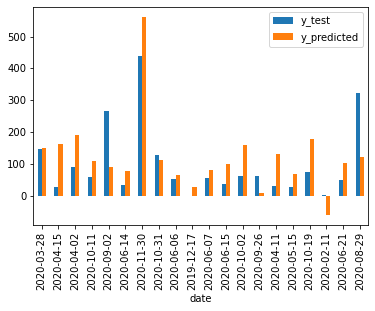

In [13]:
import matplotlib as mpl
#mpl.rc('font', family='Batang')
dty=pd.DataFrame(y_compare)[:20]
dty.plot(y=['y_test', 'y_predicted'], kind="bar")

In [14]:
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력합니다.
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력합니다.

117.05014393279471
110.4196321949455


In [15]:
#여기부터 데이터 수정해서 더 나은 prediction 할 수 있게
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 피처마다의 VIF 계수를 출력합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns
vif

,VIF Factor,features
0,8.109108,corona
1,39.607312,cough
2,13.096820,fever
3,68.461665,muscle_pain
4,45.229562,vomit
5,59.789915,diarrhea
6,18.496619,naver_senti_score
7,18.185797,naver_num
8,17.063526,twitter_senti_score
9,28.548969,twitter_num


In [16]:
df=df.drop(['muscle_pain','diarrhea'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns
vif

,VIF Factor,features
0,7.267537,corona
1,33.776676,cough
2,12.677222,fever
3,21.693098,vomit
4,17.982893,naver_senti_score
5,17.797165,naver_num
6,15.915013,twitter_senti_score
7,26.549992,twitter_num
8,3.649026,covid_num


In [17]:
vif.features.values

array(['corona', 'cough', 'fever', 'vomit', 'naver_senti_score',
       'naver_num', 'twitter_senti_score', 'twitter_num', 'covid_num'],
      dtype=object)

In [19]:
df_re=df[['corona', 'cough', 'fever', 'vomit', 'naver_senti_score',
       'naver_num', 'twitter_senti_score', 'twitter_num', 'covid_num']]
       
X=df_re[df_re.columns.difference(['covid_num'])]
y=df_re['covid_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19)


lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
#print(model.score(X_train, y_train))
#print(model.score(X_test, y_test))



In [20]:
x_new=X_test
y_new=model.predict(x_new)
print(type(y_test))
y_compare={'y_test':y_test, 'y_predicted':y_new}
pd.DataFrame(y_compare)

<class 'pandas.core.series.Series'>


,y_test,y_predicted
date,,
2020-03-28,146,142.346519
2020-04-15,27,166.890189
2020-04-02,89,215.868998
2020-10-11,58,92.207867
2020-09-02,267,111.213362
...,...,...
2020-08-01,31,-83.989014
2020-08-09,36,25.210056
2020-10-21,91,76.689514


<AxesSubplot:xlabel='date'>

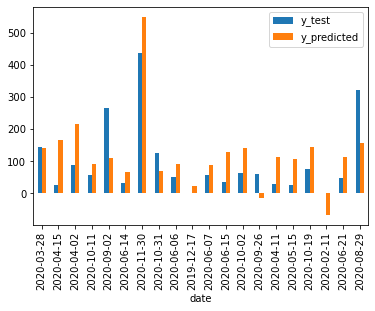

In [21]:
import matplotlib as mpl
#mpl.rc('font', family='Batang')
dty=pd.DataFrame(y_compare)[:20]
dty.plot(y=['y_test', 'y_predicted'], kind="bar")

In [22]:
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력합니다.
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력합니다.
#117.05014393279471
#110.4196321949455
#이전 값보다 test의 rmse가 줄어듦

120.25655726157139
107.84865146457753


In [23]:
#pvalue로 떨구기
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              covid_num   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     59.35
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           7.53e-55
Time:                        07:09:49   Log-Likelihood:                -1707.4
No. Observations:                 275   AIC:                             3433.
Df Residuals:                     266   BIC:                             3465.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.1119     53.934      0.280      0.780     -91.080     121.303
corona                 12.8926      0.624     20.652      0.000      11.663      14.122
cough                 -20.0732      2.841     -7.066      0.000     -25.667     -14.480
fever                   5.6913      2.019      2.818      0.005       1.715       9.667
naver_num               0.0028      0.020      0.142      0.887      -0.036       0.042
naver_senti_score      -0.0009      0.004     -0.251      0.802      -0.008       0.006
twitter_num             0.1836      0.501      0.366      0.714      -0.803       1.170
twitter_senti_score     0.1562      0.039      3.964      0.000       0.079       0.234
vomit                  34.1518      7.139      4.784      0.000      20.095      48.208
==============================================================================
Omnibus:                       59.579   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.994
Skew:                           0.670   Prob(JB):                     8.31e-83
Kurtosis:                       8.585   Cond. No.                     6.92e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
df_re2=df_re.drop(['naver_senti_score','twitter_num','naver_num'], axis=1)
X=df_re2[df_re2.columns.difference(['covid_num'])]
y=df_re2['covid_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19)


lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)


In [47]:
x_new=X_test
y_new=model.predict(x_new)
print(type(y_test))
y_compare={'y_test':y_test, 'y_predicted':y_new}
pd.DataFrame(y_compare)

<class 'pandas.core.series.Series'>


,y_test,y_predicted
date,,
2020-03-28,146,144.700136
2020-04-15,27,166.510702
2020-04-02,89,220.562721
2020-10-11,58,95.570793
2020-09-02,267,116.854206
...,...,...
2020-08-01,31,-78.697180
2020-08-09,36,25.584318
2020-10-21,91,75.813994


<AxesSubplot:xlabel='date'>

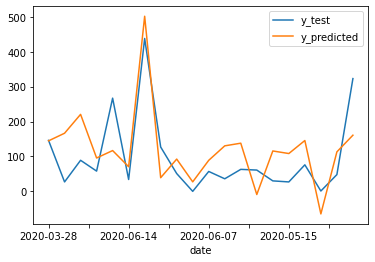

In [59]:
import matplotlib as mpl
#mpl.rc('font', family='Batang')
dty=pd.DataFrame(y_compare)[:20]
dty.plot(y=['y_test', 'y_predicted'], kind="line")

In [49]:
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력합니다.
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력합니다.
#117.05014393279471
#110.4196321949455
#이전 값보다 test의 rmse가 줄어듦

120.89719009057005
110.35124801341755


In [50]:
df_re2

,corona,cough,fever,vomit,twitter_senti_score,covid_num
date,,,,,,
2019-11-20,0.00823,10.11235,6.20934,5.89394,0,0
2019-11-21,0.00937,10.78257,5.47999,6.46560,-221,0
2019-11-22,0.00819,9.77725,3.64675,5.32229,-132,0
2019-11-23,0.00860,9.54070,2.75970,5.63768,-107,0
2019-11-24,0.00676,9.77725,3.27222,5.40114,-102,0
...,...,...,...,...,...,...
2020-12-13,46.28487,9.50128,7.25409,7.49063,-800,1030
2020-12-14,44.52544,9.93494,10.90084,9.40272,-551,718
2020-12-15,34.52029,9.59984,10.54602,8.67336,-544,880


In [51]:
lm_model_df_re2 = smf.ols('covid_num~ corona+cough+fever+vomit+twitter_senti_score',data=df_re2).fit()
print(lm_model_df_re2.summary())

                            OLS Regression Results                            
Dep. Variable:              covid_num   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     118.4
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           8.71e-76
Time:                        10:58:59   Log-Likelihood:                -2432.3
No. Observations:                 394   AIC:                             4877.
Df Residuals:                     388   BIC:                             4900.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.6237    

In [30]:
#pvalue값이 유의수준 0.05보다 작기 때문에 설명력이 크다고 할 수 있다. 
#또한 prob(F-dddf)eh 0.05보다 작아서 이 선형회귀 모형이 통계적으로 유의미하다는 것을 알 수 있다. 
#하지만 Cond.No가 30보다 큰 값을 가지기 때문에 지표들간의 다중 공선성 문제가 의심되는 모델이다.
#전진선택법, 후진선택법으로 선택한 것보다 이게 ACI 값도 그나마 제일 작고(작을수록 모형이 잘 적합되었다는 것)

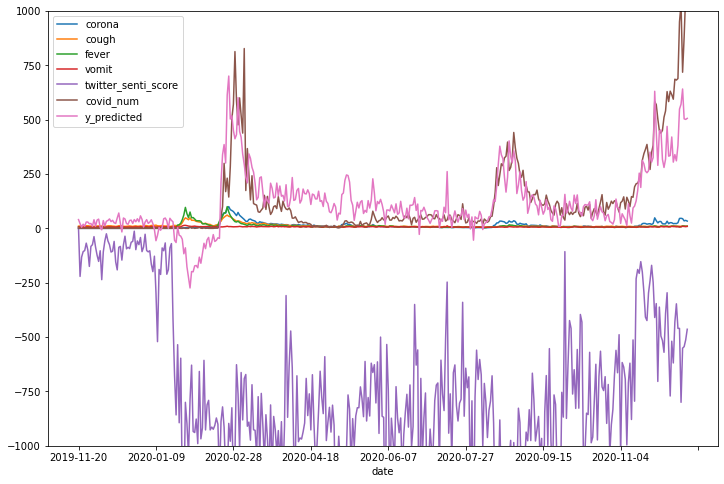

In [65]:
from pylab import rcParams

rcParams['figure.figsize'] = 12, 8
df_re2.plot()
#df.기침.plot()
#df.covid_num.plot()

plt.ylim(-1000,1000)

plt.show()

In [63]:
print(model.score(X_train, y_train)) # train R2 score를 출력합니다.
print(model.score(X_test, y_test)) # test R2 score를 출력합니다.

0.6370995879864915
0.3230727047413201


In [64]:
from pylab import rcParams

#rcParams['figure.figsize'] = 12, 8
#df_re2.plot()
df.y_predicted.plot()
df.covid_num.plot()

plt.ylim(-1000,1000)

plt.show()

AttributeError: 'DataFrame' object has no attribute 'y_predicted'

In [34]:
df=pd.read_csv('datalab.csv',encoding='utf-8',header=0)
df=df.set_index('date')

In [39]:
#전진 선택법을 이용한 다중 회귀 분석
variables = list(df.columns)
y = df['covid_num']  ## 반응 변수
selected_variables = []  ## 선택된 변수들
sl_enter = 0.05
sv_per_step = []  ## 각 스텝별로 선택된 변수들
adjusted_r_squared = []  ## 각 스텝별 수정된 결정계수
steps = []  ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder)  ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서
    ## 선형 모형을 적합한다.
    for col in remainder:
        X = df[selected_variables + [col]]
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        pval[col] = model.pvalues[col]
    min_pval = pval.min()
    if min_pval < sl_enter:  ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y, sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break
selected_variables_using_forward = selected_variables


<ipython-input-39-ba46bb2320d8>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-39-ba46bb2320d8>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-39-ba46bb2320d8>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-39-ba46bb2320d8>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

In [41]:
#후진소거법을 이용한 다중 회귀 분석
y = df['covid_num']  ## 반응 변수
selected_variables = variables  ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.05
sv_per_step = []  ## 각 스텝별로 선택된 변수들
adjusted_r_squared = []  ## 각 스텝별 수정된 결정계수
steps = []  ## 스텝
step = 0
while len(variables) > 0:
    X = sm.add_constant(df[selected_variables])
    p_vals = sm.OLS(y, X).fit().pvalues[1:]  ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max()  ## 최대 p-value
    if max_pval >= sl_remove:  ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y, sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break
selected_variables_using_backward = selected_variables

In [43]:
#단계별선택법을 이용한 다중회귀분석
y = df['covid_num']  ## 반응 변수
selected_variables = []  ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
sv_per_step = []  ## 각 스텝별로 선택된 변수들
adjusted_r_squared = []  ## 각 스텝별 수정된 결정계수
steps = []  ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder)  ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서
    ## 선형 모형을 적합한다.
    for col in remainder:
        X = df[selected_variables + [col]]
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        pval[col] = model.pvalues[col]
    min_pval = pval.min()
    if min_pval < sl_enter:  ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y, selected_X).fit().pvalues[1:]  ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove:  ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y, sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break
selected_variables_using_stepwise= selected_variables

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  ## 변수의 p-value
<ipython-input-43-5368f359c63c>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) 

KeyboardInterrupt: 

In [44]:
print(selected_variables_using_forward)
print(selected_variables_using_backward)
#print(selected_variables_using_stepwise)

['covid_num', 'cough', 'naver_senti_score', 'fever', 'twitter_senti_score', 'twitter_num']
['fever', 'naver_senti_score', 'twitter_senti_score', 'twitter_num', 'covid_num']


In [45]:
lm_model_forward = smf.ols('covid_num~ cough+naver_senti_score+fever+twitter_senti_score+twitter_num',data=df).fit()
print(lm_model_forward.summary())
lm_model_backward = smf.ols('covid_num~ fever+naver_senti_score+twitter_senti_score+twitter_num',data=df).fit()
print(lm_model_backward.summary())

                            OLS Regression Results                            
Dep. Variable:              covid_num   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     2.412
Date:                Tue, 22 Dec 2020   Prob (F-statistic):             0.0359
Time:                        07:26:57   Log-Likelihood:                -2608.8
No. Observations:                 394   AIC:                             5230.
Df Residuals:                     388   BIC:                             5253.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              29.1853    